In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Create an empty list to store the dataframes
dataframes = []
directory = '../data/tests/local/'
# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        dataframes.append(df)        # Append the DataFrame to the list

In [13]:
data_local = pd.concat(dataframes, ignore_index=True)
data_server = pd.read_csv('../data/tests/resource_usage_server_1734489502014.csv')
data_delegation = pd.read_csv('../data/tests/resource_usage_delegation_1735056588645.csv')

In [14]:
cpu_usage = [
    data_local["cpu_usage"].mean() * 100,
    data_server["cpu_usage"].mean() * 100,
    data_delegation["cpu_usage"].mean() * 100,
]

memory_usage = [
    data_local["memory_usage"].mean() * 100,
    data_server["memory_usage"].mean() * 100,
    data_delegation["memory_usage"].mean() * 100,
]

processing_times = [
    data_local["processing_time"].mean()*1000,
    data_server["processing_time"].mean()*1000,
    data_delegation["processing_time"].mean()*1000,
]

configurations = ["Local", "Edge", "Task Delegation Algorithm"]

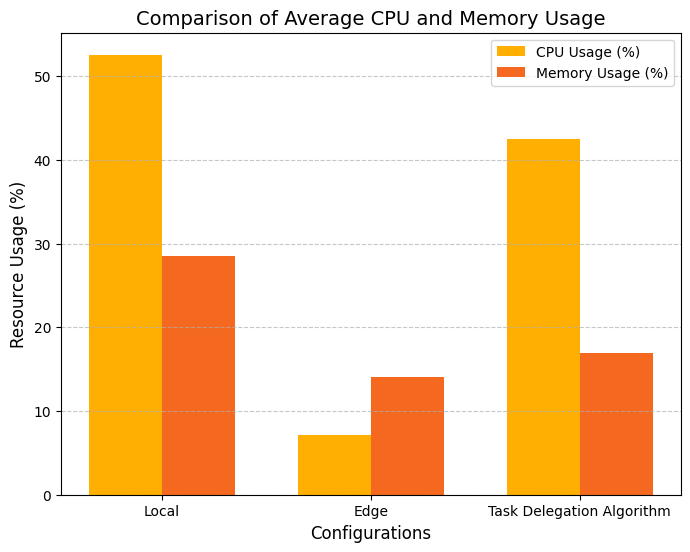

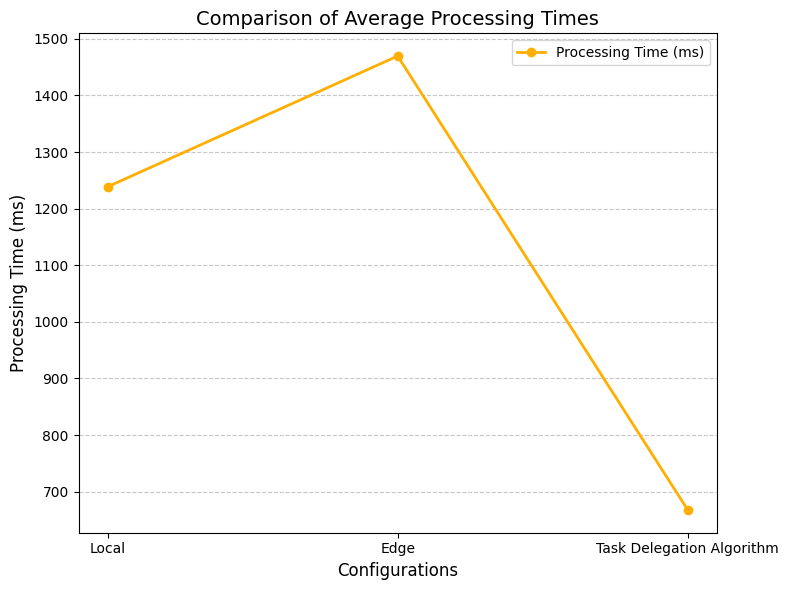

In [15]:


fig1, ax1 = plt.subplots(figsize=(8, 6))
width = 0.35  # Ancho de las barras

x = np.arange(len(configurations))
bar1 = ax1.bar(x - width / 2, cpu_usage, width, label="CPU Usage (%)", color="#ffaf01")
bar2 = ax1.bar(
    x + width / 2, memory_usage, width, label="Memory Usage (%)", color="#f4681f"
)

ax1.set_xlabel("Configurations", fontsize=12)
ax1.set_ylabel("Resource Usage (%)", fontsize=12)
ax1.set_title("Comparison of Average CPU and Memory Usage", fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(configurations)
ax1.legend()
ax1.grid(axis="y", linestyle="--", alpha=0.7)


fig2, ax2 = plt.subplots(figsize=(8, 6))
ax2.plot(
    configurations,
    processing_times,
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Processing Time (ms)",
    color="#ffaf01",
)
ax2.set_xlabel("Configurations", fontsize=12)
ax2.set_ylabel("Processing Time (ms)", fontsize=12)
ax2.set_title("Comparison of Average Processing Times", fontsize=14)
ax2.legend()
ax2.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

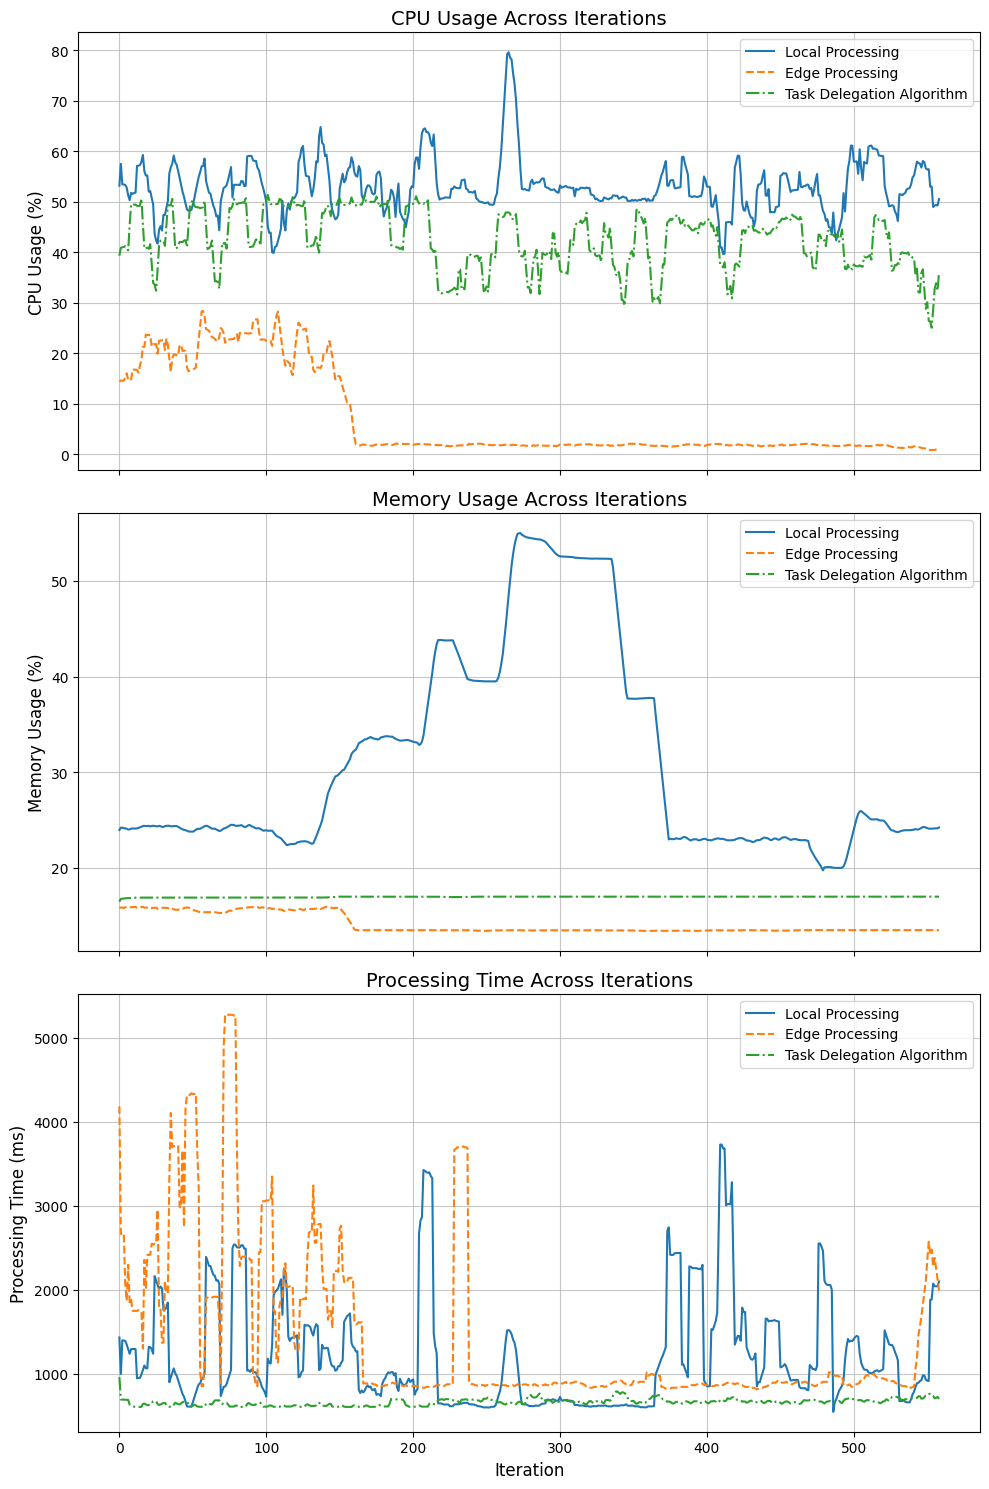

In [16]:

iterations_large = np.arange(1, len(data_server))  # 300 iteraciones
cpu_usage_local_large = data_local["cpu_usage"].to_numpy()[:len(data_server)] * 100
cpu_usage_edge_large = data_server["cpu_usage"].to_numpy() * 100
cpu_usage_delegation_large = data_delegation["cpu_usage"].to_numpy() * 100

memory_usage_local_large = data_local["memory_usage"].to_numpy()[:len(data_server)] * 100
memory_usage_edge_large = data_server["memory_usage"].to_numpy() * 100
memory_usage_delegation_large = data_delegation["memory_usage"].to_numpy() * 100

processing_time_local_large = data_local["processing_time"].to_numpy()[:len(data_server)] * 1000
processing_time_edge_large = data_server["processing_time"].to_numpy() * 1000
processing_time_delegation_large = data_delegation["processing_time"].to_numpy() * 1000

# Suavización mediante promedios móviles
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

window_size = 10  # Ventana de promedio móvil

# Aplicar promedio móvil a los datos
cpu_usage_local_smooth = moving_average(cpu_usage_local_large, window_size)
cpu_usage_edge_smooth = moving_average(cpu_usage_edge_large, window_size)
cpu_usage_delegation_smooth = moving_average(cpu_usage_delegation_large, window_size)

memory_usage_local_smooth = moving_average(memory_usage_local_large, window_size)
memory_usage_edge_smooth = moving_average(memory_usage_edge_large, window_size)
memory_usage_delegation_smooth = moving_average(memory_usage_delegation_large, window_size)

processing_time_local_smooth = moving_average(processing_time_local_large, window_size)
processing_time_edge_smooth = moving_average(processing_time_edge_large, window_size)
processing_time_delegation_smooth = moving_average(processing_time_delegation_large, window_size)

# Gráfica de series de tiempo con datos suavizados
fig, ax = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Uso de CPU
ax[0].plot(cpu_usage_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
ax[0].plot(cpu_usage_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
ax[0].plot(cpu_usage_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
ax[0].set_ylabel("CPU Usage (%)", fontsize=12)
ax[0].set_title("CPU Usage Across Iterations", fontsize=14)
ax[0].legend()
ax[0].grid(alpha=0.7)

# Uso de Memoria
ax[1].plot(memory_usage_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
ax[1].plot(memory_usage_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
ax[1].plot(memory_usage_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
ax[1].set_ylabel("Memory Usage (%)", fontsize=12)
ax[1].set_title("Memory Usage Across Iterations", fontsize=14)
ax[1].legend()
ax[1].grid(alpha=0.7)

# Tiempos de procesamiento
ax[2].plot(processing_time_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
ax[2].plot(processing_time_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
ax[2].plot(processing_time_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
ax[2].set_ylabel("Processing Time (ms)", fontsize=12)
ax[2].set_xlabel("Iteration", fontsize=12)
ax[2].set_title("Processing Time Across Iterations", fontsize=14)
ax[2].legend()
ax[2].grid(alpha=0.7)

plt.tight_layout()
plt.show()


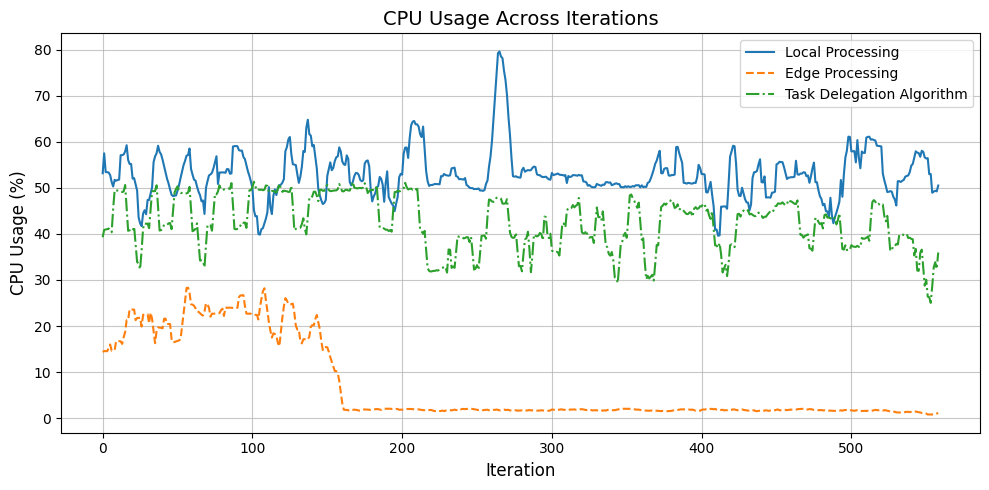

In [17]:
# Gráfica de Uso de CPU
plt.figure(figsize=(10, 5))
plt.plot(cpu_usage_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
plt.plot(cpu_usage_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
plt.plot(cpu_usage_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
plt.ylabel("CPU Usage (%)", fontsize=12)
plt.xlabel("Iteration", fontsize=12)
plt.title("CPU Usage Across Iterations", fontsize=14)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

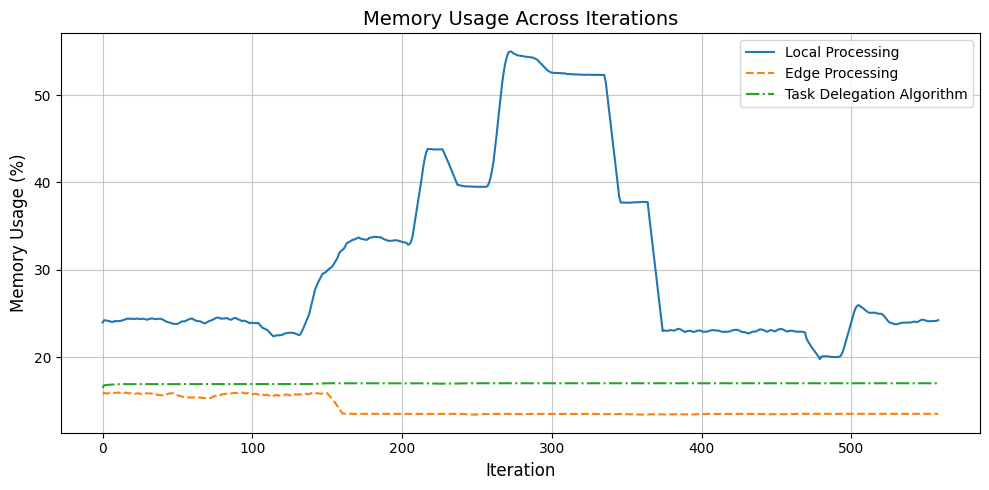

In [18]:
# Gráfica de Uso de Memoria
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
plt.plot(memory_usage_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
plt.plot(memory_usage_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
plt.ylabel("Memory Usage (%)", fontsize=12)
plt.xlabel("Iteration", fontsize=12)
plt.title("Memory Usage Across Iterations", fontsize=14)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

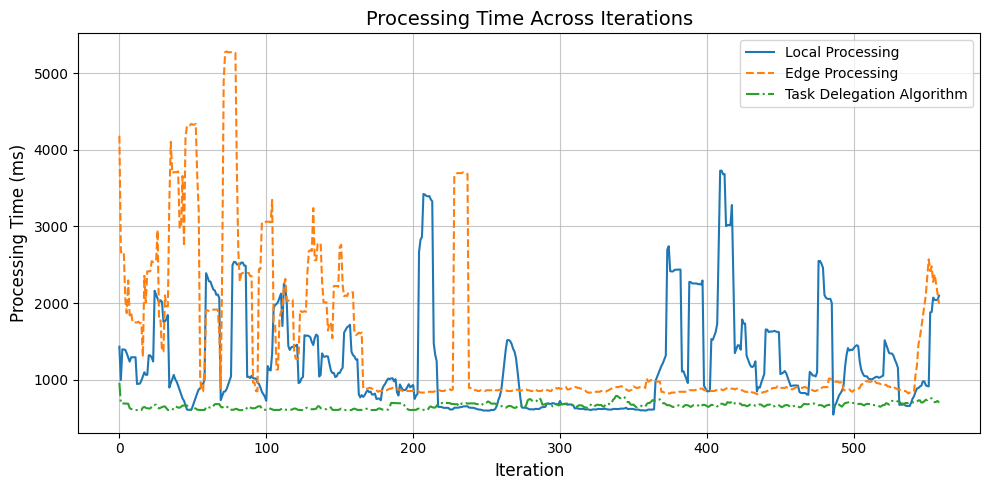

In [19]:
# Gráfica de Tiempos de Procesamiento
plt.figure(figsize=(10, 5))
plt.plot(processing_time_local_smooth, label='Local Processing', linestyle='-', linewidth=1.5)
plt.plot(processing_time_edge_smooth, label='Edge Processing', linestyle='--', linewidth=1.5)
plt.plot(processing_time_delegation_smooth, label='Task Delegation Algorithm', linestyle='-.', linewidth=1.5)
plt.ylabel("Processing Time (ms)", fontsize=12)
plt.xlabel("Iteration", fontsize=12)
plt.title("Processing Time Across Iterations", fontsize=14)
plt.legend()
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()